In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
#pip install -U scikit-learn

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
master_df=pd.read_csv('../data/processed/master_df.csv')

In [5]:
master_df

,Job Card No,Parts Total,OSL Total,Labour Total,Misc Total,Make,Model,StateName_Pincode,City,Customer No.,Regn No,Service_time_category,Service_Time,Pincode_final,KMs Reading,Invoice_count,Cust Type,Order Type,JobCard Date,Name 1,House number and street,Plant,DBM Order,Description,Item Category,Order Quantity,Net value,Business Partner,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date,Vehicle Model,Product GUID,License Plate Number,Fuel Type
0,4,11042.62,2399.95,3455.92,100.00,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,NaN,E4981,MH03F9574,super_slow,5 days 23:09:10.000000000,600032.00,191383,1,Retail,Running Repairs,2012-04-01,NaN,NaN,BC01,4.00,"['WUERTH ANTIFREEZ COOLANT GREEN', 'VALVE 1-IN...","['P002', 'P002', 'P002', 'P002', 'P002', 'P002...",731.60,16998.49,E4981,1.00,Z001,nan,nan,nan,nan,nan,Z_MAHINDRA,000C293D43BA1ED19EE61FA82D340E07,MH03F9574,nan
1,5,1469.33,0.00,2310.47,0.00,GENERAL MOTORS,OPTRA,Maharashtra,NaN,10,MH43A5790,mid,2 days 03:10:25.000000000,400093.00,105073,1,Retail,Paid Service,2012-04-02,NaN,NaN,BC01,5.00,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...","['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",290.20,3779.80,NaN,nan,NaN,nan,nan,nan,nan,nan,Z_GENERAL MOTORS,000C293D43BA1ED19F9162EE062F4C6B,MH43A5790,1.00
2,5,1469.33,0.00,2310.47,0.00,GENERAL MOTORS,OPTRA,Maharashtra,NaN,10,MH43A5790,mid,2 days 03:10:25.000000000,400093.00,105073,1,Retail,Paid Service,2012-04-02,NaN,NaN,BC01,5.00,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...","['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",290.20,3779.80,NaN,nan,NaN,nan,nan,nan,nan,nan,Z_GENERAL MOTORS,000C293D43BA1ED19F92B1DB21C89B9B,MH43A5790,nan
3,5,1469.33,0.00,2310.47,0.00,GENERAL MOTORS,OPTRA,Maharashtra,NaN,10,MH43A5790,mid,2 days 03:10:25.000000000,400093.00,105073,1,Retail,Paid Service,2012-04-02,NaN,NaN,BC01,5.00,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...","['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",290.20,3779.80,NaN,nan,NaN,nan,nan,nan,nan,nan,Z_GENERAL MOTORS,000C29888B381ED19EE5933DF2C50397,MH43A5790,nan
4,6,0.00,0.00,1340.37,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Telangana,NaN,7,AP11AB0153,super_fast,0 days 04:56:04.000000000,500038.00,137832,1,Retail,Paid Service,2012-04-02,NaN,NaN,BC04,6.00,"['Paid Service-Minor', 'REPLACE STARTER MOTOR ...","['P001', 'P001', 'P001']",109.00,1340.37,NaN,nan,NaN,nan,nan,nan,nan,nan,Z_MAHINDRA,000C293D43BA1ED19F92418342B55630,AP11AB0153,1.00
5,7,0.00,0.00,167.36,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Maharashtra,NaN,11,MH15BD5265,fast,0 days 23:30:29.000000000,422001.00,136240,1,Retail,Running Repairs,2012-04-02,NaN,NaN,BC03,7.00,['MISC LABOR 0.25 HOURS'],['P001'],36.50,167.36,NaN,nan,NaN,nan,nan,nan,nan,nan,Z_MAHINDRA,000C293D43BA1EE19F92DF811E9109CE,MH15BD5265,2.00
6,9,662.01,0.00,616.12,0.00,MARUTI SUZUKI,SWIFT,NaN,NaN,E22798,MH08Q5679,fast,1 days 05:51:15.000000000,422000.00,78513,1,Retail,Paid Service,2012-04-02,NaN,NaN,BC03,9.00,"['CLIP', 'BULB 55W,12V,PGJ19-2,H11', 'BOLT 10M...","['P002', 'P002', 'P002', 'P002', 'P002', 'P001...",28.00,1278.13,E22798,1.00,Z001,nan,nan,nan,nan,nan,Z_MARUTI,000C29888B381EE19EE56A5C036F0A8C,MH08Q5679,nan
7,10,5722.37,0.00,1377.99,0.00,FORD,FIESTA,Maharashtra,NaN,14,MH41C6785,fast,1 days 04:55:31.000000000,422013.00,49842,1,Retail,Paid Service,2012-04-02,NaN,NaN,BC03,10.00,"['Wheel Alignment', 'Wheel Balancing (5 Wheels...","['P001', 'P001', 'P002', 'P002', 'P002', 'P002...",66.80,7100.36,NaN,nan,NaN,nan,nan,nan,nan,nan,Z_FORD,000C293D43BA1EE19F94AC3EE28D51B7,MH41C6785,2.00
8,10,5722.37,0.00,1377.99,0.00,FORD,FIESTA,Maharashtra,NaN,14,MH41C6785,fast,1 days 04:55:31.000000000,422013.00,49842,1,Retail,Paid Service,2012-04-02,NaN,NaN,BC03,10.00,"['Wheel Alignment', 'Wheel Balancing (5 Wheels...","['P001', 'P001', 'P002', 'P002', 'P002', 'P002...",66.80,7100.36,NaN,nan,NaN,nan,nan,nan,nan,nan,Z_FORD,000C293D43BA1EE19EE42D03D4F309F1,MH41C6785,nan
9,11,10756.82,120.00,2377.55,100.00,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,NaN,E498

In [6]:
master_df['JobCard Date']=pd.to_datetime(master_df['JobCard Date'])
master_df['Year']=master_df['JobCard Date'].dt.year

In [7]:
master_df['DayName']=master_df['JobCard Date'].dt.day_name()
master_df['DayName'].value_counts()

Saturday     158865
Monday       145554
Tuesday      145080
Wednesday    142951
Friday       140877
Thursday     139092
Sunday        66506
Name: DayName, dtype: int64

In [8]:
master_df.isnull().sum()*100/len(master_df)

Job Card No                 0.00
Parts Total                 0.00
OSL Total                   0.00
Labour Total                0.00
Misc Total                  0.00
Make                        0.00
Model                       0.17
StateName_Pincode           4.84
City                       24.45
Customer No.                0.00
Regn No                     0.00
Service_time_category       0.00
Service_Time                0.00
Pincode_final               0.00
KMs Reading                 0.00
Invoice_count               0.00
Cust Type                   0.00
Order Type                  0.00
JobCard Date                0.00
Name 1                     24.45
House number and street    24.56
Plant                       0.00
DBM Order                   0.01
Description                 0.01
Item Category               0.01
Order Quantity              0.01
Net value                   0.01
Business Partner           97.77
Partner Type               97.97
Data Origin                98.18
Title     

In [9]:
cols_with_missingvalues=['Business Partner','Partner Type','Data Origin','Title','Marital Status','Occupation','Date of Birth','Death date']
master_df=master_df[master_df.columns.difference(cols_with_missingvalues)]

In [10]:
master_df

,City,Cust Type,Customer No.,DBM Order,DayName,Description,Fuel Type,House number and street,Invoice_count,Item Category,Job Card No,JobCard Date,KMs Reading,Labour Total,License Plate Number,Make,Misc Total,Model,Name 1,Net value,OSL Total,Order Quantity,Order Type,Parts Total,Pincode_final,Plant,Product GUID,Regn No,Service_Time,Service_time_category,StateName_Pincode,Vehicle Model,Year
0,NaN,Retail,E4981,4.00,Sunday,"['WUERTH ANTIFREEZ COOLANT GREEN', 'VALVE 1-IN...",nan,NaN,1,"['P002', 'P002', 'P002', 'P002', 'P002', 'P002...",4,2012-04-01,191383,3455.92,MH03F9574,MAHINDRA & MAHINDRA,100.00,LOGAN P,NaN,16998.49,2399.95,731.60,Running Repairs,11042.62,600032.00,BC01,000C293D43BA1ED19EE61FA82D340E07,MH03F9574,5 days 23:09:10.000000000,super_slow,Tamil Nadu,Z_MAHINDRA,2012
1,NaN,Retail,10,5.00,Monday,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...",1.00,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",5,2012-04-02,105073,2310.47,MH43A5790,GENERAL MOTORS,0.00,OPTRA,NaN,3779.80,0.00,290.20,Paid Service,1469.33,400093.00,BC01,000C293D43BA1ED19F9162EE062F4C6B,MH43A5790,2 days 03:10:25.000000000,mid,Maharashtra,Z_GENERAL MOTORS,2012
2,NaN,Retail,10,5.00,Monday,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...",nan,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",5,2012-04-02,105073,2310.47,MH43A5790,GENERAL MOTORS,0.00,OPTRA,NaN,3779.80,0.00,290.20,Paid Service,1469.33,400093.00,BC01,000C293D43BA1ED19F92B1DB21C89B9B,MH43A5790,2 days 03:10:25.000000000,mid,Maharashtra,Z_GENERAL MOTORS,2012
3,NaN,Retail,10,5.00,Monday,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...",nan,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",5,2012-04-02,105073,2310.47,MH43A5790,GENERAL MOTORS,0.00,OPTRA,NaN,3779.80,0.00,290.20,Paid Service,1469.33,400093.00,BC01,000C29888B381ED19EE5933DF2C50397,MH43A5790,2 days 03:10:25.000000000,mid,Maharashtra,Z_GENERAL MOTORS,2012
4,NaN,Retail,7,6.00,Monday,"['Paid Service-Minor', 'REPLACE STARTER MOTOR ...",1.00,NaN,1,"['P001', 'P001', 'P001']",6,2012-04-02,137832,1340.37,AP11AB0153,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,NaN,1340.37,0.00,109.00,Paid Service,0.00,500038.00,BC04,000C293D43BA1ED19F92418342B55630,AP11AB0153,0 days 04:56:04.000000000,super_fast,Telangana,Z_MAHINDRA,2012
5,NaN,Retail,11,7.00,Monday,['MISC LABOR 0.25 HOURS'],2.00,NaN,1,['P001'],7,2012-04-02,136240,167.36,MH15BD5265,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,NaN,167.36,0.00,36.50,Running Repairs,0.00,422001.00,BC03,000C293D43BA1EE19F92DF811E9109CE,MH15BD5265,0 days 23:30:29.000000000,fast,Maharashtra,Z_MAHINDRA,2012
6,NaN,Retail,E22798,9.00,Monday,"['CLIP', 'BULB 55W,12V,PGJ19-2,H11', 'BOLT 10M...",nan,NaN,1,"['P002', 'P002', 'P002', 'P002', 'P002', 'P001...",9,2012-04-02,78513,616.12,MH08Q5679,MARUTI SUZUKI,0.00,SWIFT,NaN,1278.13,0.00,28.00,Paid Service,662.01,422000.00,BC03,000C29888B381EE19EE56A5C036F0A8C,MH08Q5679,1 days 05:51:15.000000000,fast,NaN,Z_MARUTI,2012
7,NaN,Retail,14,10.00,Monday,"['Wheel Alignment', 'Wheel Balancing (5 Wheels...",2.00,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P002...",10,2012-04-02,49842,1377.99,MH41C6785,FORD,0.00,FIESTA,NaN,7100.36,0.00,66.80,Paid Service,5722.37,422013.00,BC03,000C293D43BA1EE19F94AC3EE28D51B7,MH41C6785,1 days 04:55:31.000000000,fast,Maharashtra,Z_FORD,2012
8,NaN,Retail,14,10.00,Monday,"['Wheel Alignment', 'Wheel Balancing (5 Wheels...",nan,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P002...",10,2012-04-02,49842,1377.99,MH41C6785,FORD,0.00,FIESTA,NaN,7100.36,0.00,66.80,Paid Service,5722.37,422013.00,BC03,000C293D43BA1EE19EE42D03D4F309F1,MH41C6785,1 days 04:55:31.000000000,fast,Maharashtra,Z_FORD,2012
9,NaN,Retail,E4981,11.00,Sunday,"['SCR-1ST MTG, CYL HEAD COVER', 'RADIATOR FAN'...",nan,NaN,1,"['P002', 'P002', 'P002', 'P002', 'P002', 'P002...",11,2012-04-01,204207,2377.55,MH01JA5144,MAHINDRA & MAHINDRA,100.00,LOGAN P,NaN,13354.37,120.00,528.00,Running Repairs,10756.82,600032.00,BC01,000C293D43BA1EE19EE62A3FE1CCC7E9,MH01JA5144,8 days 01:03:10.000000000,

In [11]:
master_df['Cust Type'].value_counts()

Retail                       932166
Retail, Insurance              3111
Fleets                         2323
Corporate others                608
Corporate- M&M                  321
MFCWL                           241
Franchise                       137
Insurance                        10
Retail, nan                       4
Insurance, Corporate- M&M         3
Retail, Corporate others          1
Name: Cust Type, dtype: int64

In [12]:
master_df.loc[master_df['KMs Reading']==master_df['KMs Reading'].max(),['Regn No','KMs Reading']]
## 999999 means nothing

,Regn No,KMs Reading
339521,MH31DK0193,9999999
369660,MH31DK0193,9999999
374716,MH31DK0193,9999999


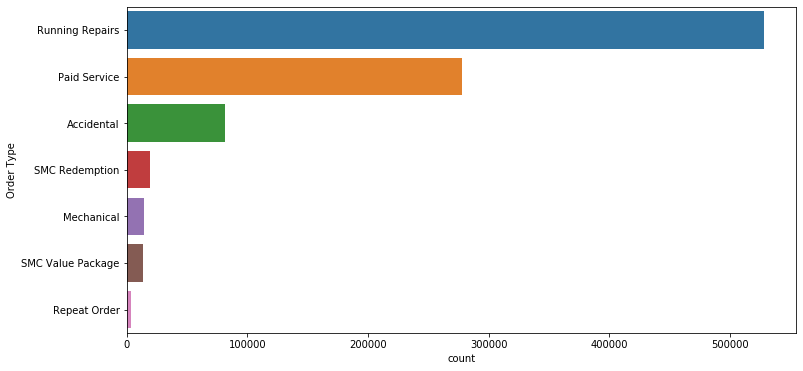

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(y=master_df['Order Type'],order=master_df['Order Type'].value_counts().iloc[:7].index)
plt.show()

In [14]:
## Order type of jobs which is most frequent is running repairs  followed by Paid servicing and then by Accidental damage

In [15]:
master_df=master_df.loc[master_df['KMs Reading']!=9999999,:]

In [16]:
len(master_df)

938922

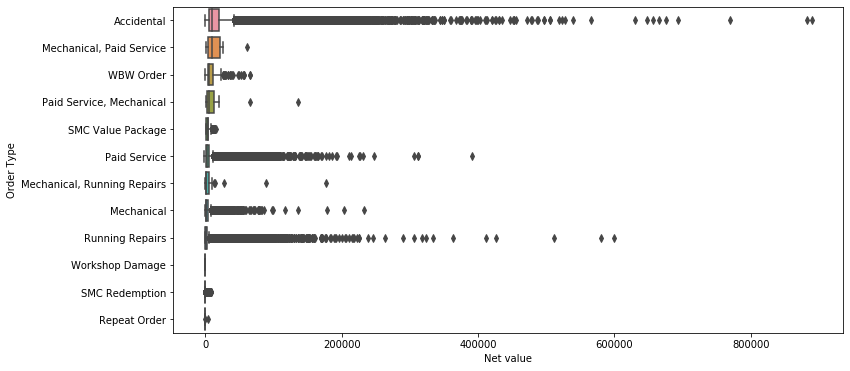

In [17]:
plt.figure(figsize=(12,6))

sns.boxplot(y='Order Type',x='Net value',data=master_df,order=master_df.groupby('Order Type')['Net value'].median().sort_values(ascending=False).index)

In [18]:
# Order type Accidental has generated more revenue followed by Running repairs and then by Paid services

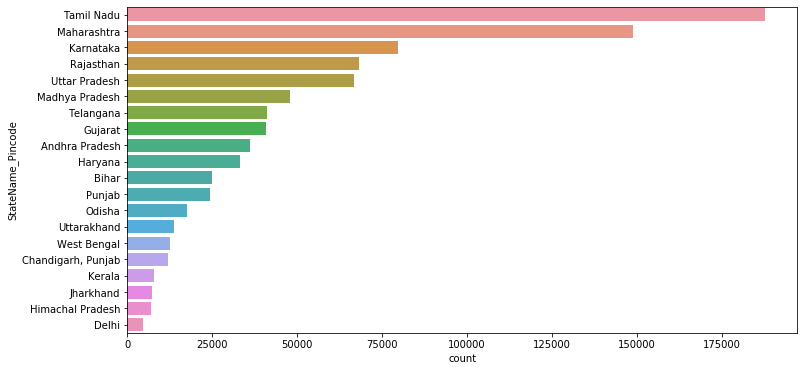

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(y=master_df['StateName_Pincode'],order=master_df['StateName_Pincode'].value_counts().iloc[:20].index)

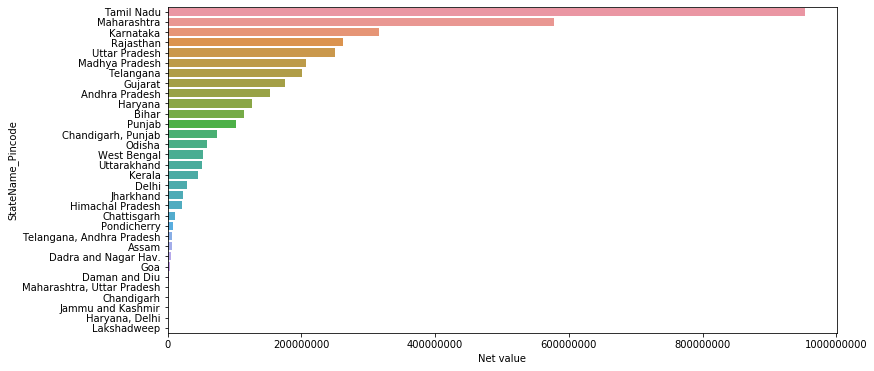

In [170]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
net_value_state=master_df.groupby('StateName_Pincode')['Net value'].sum().reset_index().sort_values(by='Net value',ascending=False)
sns.barplot(x=net_value_state['Net value'],y=net_value_state['StateName_Pincode'],data=net_value_state.head(20))

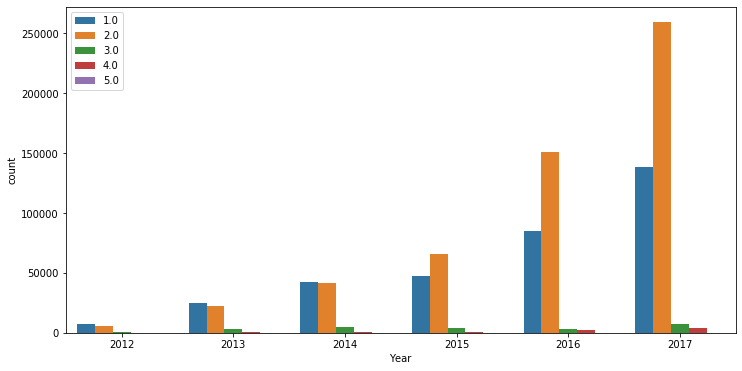

In [255]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year',hue="Fuel Type",data=master_df)
plt.legend(loc='upper left')

In [172]:
master_df.loc[master_df['StateName_Pincode'].isin(net_value_state_5['StateName_Pincode']),:]

,City,Cust Type,Customer No.,DBM Order,DayName,Description,Fuel Type,House number and street,Invoice_count,Item Category,Job Card No,JobCard Date,KMs Reading,Labour Total,License Plate Number,Make,Misc Total,Model,Name 1,Net value,OSL Total,Order Quantity,Order Type,Parts Total,Pincode_final,Plant,Product GUID,Regn No,Service_Time,Service_time_category,StateName_Pincode,Vehicle Model,Year,month_yr
0,NaN,Retail,E4981,4.00,Sunday,"['WUERTH ANTIFREEZ COOLANT GREEN', 'VALVE 1-IN...",nan,NaN,1,"['P002', 'P002', 'P002', 'P002', 'P002', 'P002...",4,2012-04-01,191383,3455.92,MH03F9574,MAHINDRA & MAHINDRA,100.00,LOGAN P,NaN,16998.49,2399.95,731.60,Running Repairs,11042.62,600032.00,BC01,000C293D43BA1ED19EE61FA82D340E07,MH03F9574,5 days 23:09:10.000000000,super_slow,Tamil Nadu,Z_MAHINDRA,2012,Apr-2012
1,NaN,Retail,10,5.00,Monday,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...",1.00,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",5,2012-04-02,105073,2310.47,MH43A5790,GENERAL MOTORS,0.00,OPTRA,NaN,3779.80,0.00,290.20,Paid Service,1469.33,400093.00,BC01,000C293D43BA1ED19F9162EE062F4C6B,MH43A5790,2 days 03:10:25.000000000,mid,Maharashtra,Z_GENERAL MOTORS,2012,Apr-2012
2,NaN,Retail,10,5.00,Monday,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...",nan,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",5,2012-04-02,105073,2310.47,MH43A5790,GENERAL MOTORS,0.00,OPTRA,NaN,3779.80,0.00,290.20,Paid Service,1469.33,400093.00,BC01,000C293D43BA1ED19F92B1DB21C89B9B,MH43A5790,2 days 03:10:25.000000000,mid,Maharashtra,Z_GENERAL MOTORS,2012,Apr-2012
3,NaN,Retail,10,5.00,Monday,"['Paid Service-Major', 'REPLACE BRAKE PAD (BOT...",nan,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P001...",5,2012-04-02,105073,2310.47,MH43A5790,GENERAL MOTORS,0.00,OPTRA,NaN,3779.80,0.00,290.20,Paid Service,1469.33,400093.00,BC01,000C29888B381ED19EE5933DF2C50397,MH43A5790,2 days 03:10:25.000000000,mid,Maharashtra,Z_GENERAL MOTORS,2012,Apr-2012
5,NaN,Retail,11,7.00,Monday,['MISC LABOR 0.25 HOURS'],2.00,NaN,1,['P001'],7,2012-04-02,136240,167.36,MH15BD5265,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,NaN,167.36,0.00,36.50,Running Repairs,0.00,422001.00,BC03,000C293D43BA1EE19F92DF811E9109CE,MH15BD5265,0 days 23:30:29.000000000,fast,Maharashtra,Z_MAHINDRA,2012,Apr-2012
7,NaN,Retail,14,10.00,Monday,"['Wheel Alignment', 'Wheel Balancing (5 Wheels...",2.00,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P002...",10,2012-04-02,49842,1377.99,MH41C6785,FORD,0.00,FIESTA,NaN,7100.36,0.00,66.80,Paid Service,5722.37,422013.00,BC03,000C293D43BA1EE19F94AC3EE28D51B7,MH41C6785,1 days 04:55:31.000000000,fast,Maharashtra,Z_FORD,2012,Apr-2012
8,NaN,Retail,14,10.00,Monday,"['Wheel Alignment', 'Wheel Balancing (5 Wheels...",nan,NaN,1,"['P001', 'P001', 'P002', 'P002', 'P002', 'P002...",10,2012-04-02,49842,1377.99,MH41C6785,FORD,0.00,FIESTA,NaN,7100.36,0.00,66.80,Paid Service,5722.37,422013.00,BC03,000C293D43BA1EE19EE42D03D4F309F1,MH41C6785,1 days 04:55:31.000000000,fast,Maharashtra,Z_FORD,2012,Apr-2012
9,NaN,Retail,E4981,11.00,Sunday,"['SCR-1ST MTG, CYL HEAD COVER', 'RADIATOR FAN'...",nan,NaN,1,"['P002', 'P002', 'P002', 'P002', 'P002', 'P002...",11,2012-04-01,204207,2377.55,MH01JA5144,MAHINDRA & MAHINDRA,100.00,LOGAN P,NaN,13354.37,120.00,528.00,Running Repairs,10756.82,600032.00,BC01,000C293D43BA1EE19EE62A3FE1CCC7E9,MH01JA5144,8 days 01:03:10.000000000,super_slow,Tamil Nadu,Z_MAHINDRA,2012,Apr-2012
10,NaN,Retail,E4981,12.00,Sunday,"['VALVE 1-EXAUST', 'WIPER BLADES', 'SEN-WATER ...",nan,NaN,1,"['P002', 'P002', 'P002', 'P002', 'P002', 'P002...",12,2012-04-01,166696,2450.40,MH01JA5003,MAHINDRA & MAHINDRA,100.00,LOGAN P,NaN,23451.83,4839.96,562.00,Running Repairs,16061.47,600032.00,BC01,000C293D43BA1EE19EE6BE26A9F2CCC7,MH01JA5003,20 days 00:02:08.000000000,super_slow,Tamil Nadu,Z_MAHINDRA,2012,Apr-2012
35,NaN,Retail,E24059,37.00,Sunday,[nan],nan,NaN,1,['G2TX'],37,2012-04-01,59296,0.00,MH02AL2874,GENERAL MOTORS,0.00,OPEL,NaN,0.00,0.00,0.00,Running Repairs,0.00,400014.00,BC11,000C29888B381

In [20]:
## State with maximum number of servicing ,followed by Maharshtra , Karnataka ,Rajasthan and Uttar Pradesh

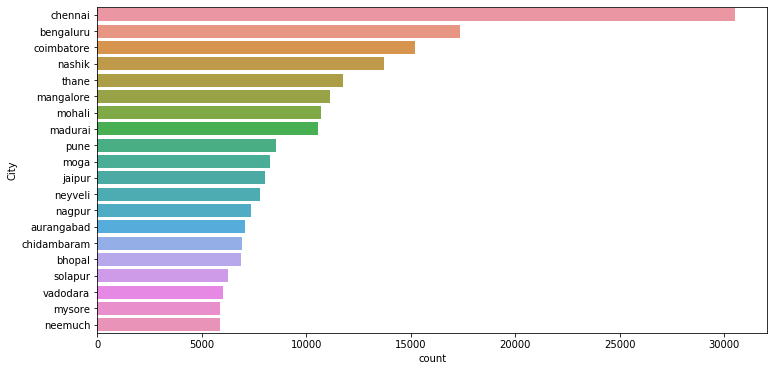

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(y=master_df['City'],order=master_df['City'].value_counts().iloc[:20].index)

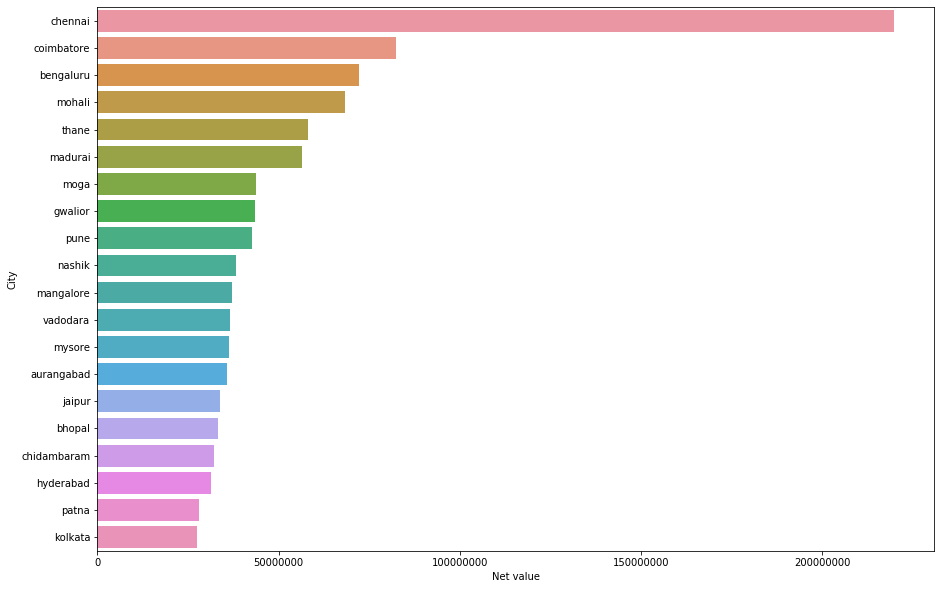

In [153]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain', axis='x')
net_value_city=master_df.groupby('City')['Net value'].sum().reset_index().sort_values(by='Net value',ascending=False)
net_value_city_20=net_value_city.head(20)
sns.barplot(x=net_value_city_20['Net value'],y=net_value_city_20['City'],data=net_value_city_20)

In [290]:
net_value_city.head(10)

,City,Net value
58,chennai,219966448.81
67,coimbatore,82313256.51
33,bengaluru,72296469.86
189,mohali,68328244.08
292,thane,58108475.85
174,madurai,56552245.46
188,moga,43720245.37
103,gwalior,43617491.96
236,pune,42621578.00
210,nashik,38222230.33


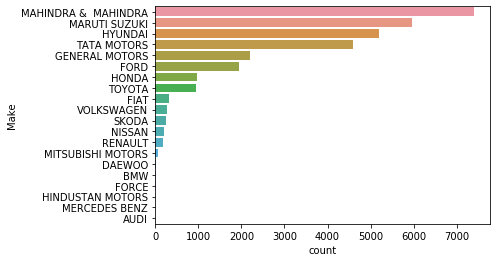

In [186]:
sns.countplot(y='Make',data=master_df.loc[master_df['City']=='chennai',:],order=master_df.loc[master_df['City']=='chennai','Make'].value_counts().index)

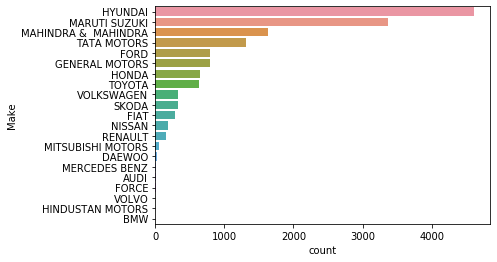

In [184]:
sns.countplot(y='Make',data=master_df.loc[master_df['City']=='coimbatore',:],order=master_df.loc[master_df['City']=='coimbatore','Make'].value_counts().index)

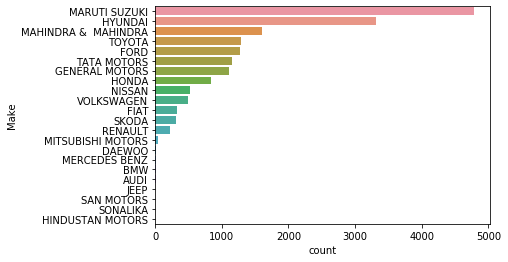

In [187]:
sns.countplot(y='Make',data=master_df.loc[master_df['City']=='bengaluru',:],order=master_df.loc[master_df['City']=='bengaluru','Make'].value_counts().index)

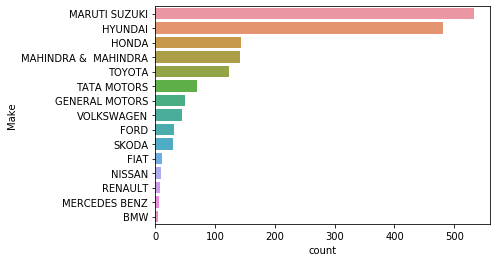

In [185]:
sns.countplot(y='Make',data=master_df.loc[master_df['City']=='mumbai',:],order=master_df.loc[master_df['City']=='mumbai','Make'].value_counts().index)

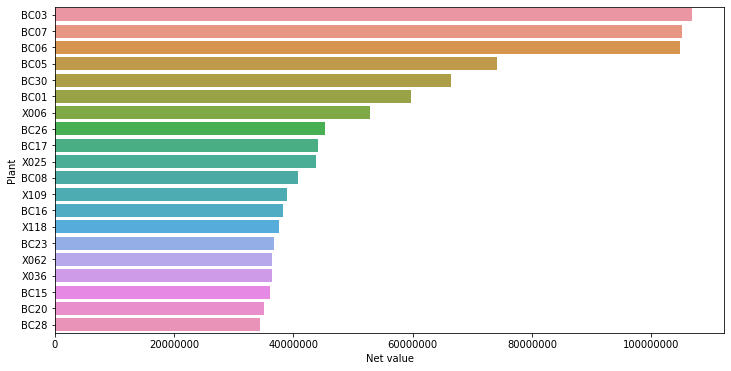

In [159]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
net_value_plant=master_df.groupby('Plant')['Net value'].sum().reset_index().sort_values(by='Net value',ascending=False)
net_value_plant_20=net_value_plant.head(20)
sns.barplot(x=net_value_plant_20['Net value'],y=net_value_plant_20['Plant'],data=net_value_plant_20)

In [ ]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
net_value_plant=master_df.groupby('Plant')['Net value'].sum().reset_index().sort_values(by='Net value',ascending=False)
net_value_plant_20=net_value_plant.head(20)
sns.barplot(x=net_value_plant_20['Net value'],y=net_value_plant_20['Plant'],data=net_value_plant_20)

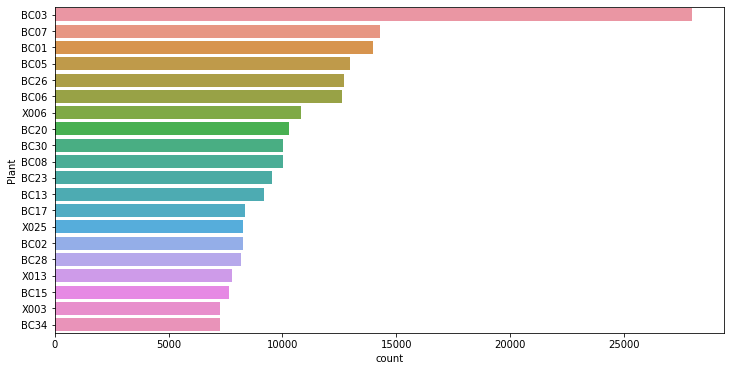

In [158]:
plt.figure(figsize=(12,6))
sns.countplot(y=master_df['Plant'],order=master_df['Plant'].value_counts().iloc[:20].index)

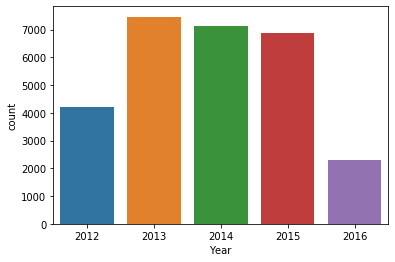

In [182]:
sns.countplot(x='Year',data=master_df.loc[master_df['Plant']=='BC03',:])

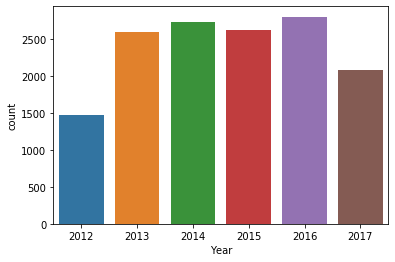

In [288]:
sns.countplot(x='Year',data=master_df.loc[master_df['Plant']=='BC07',:])

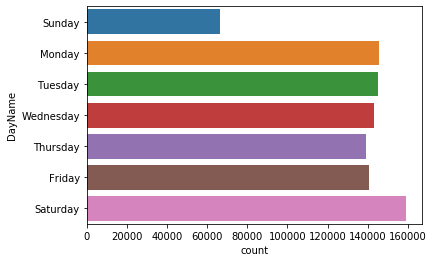

In [292]:
sns.countplot(y='DayName',data=master_df)

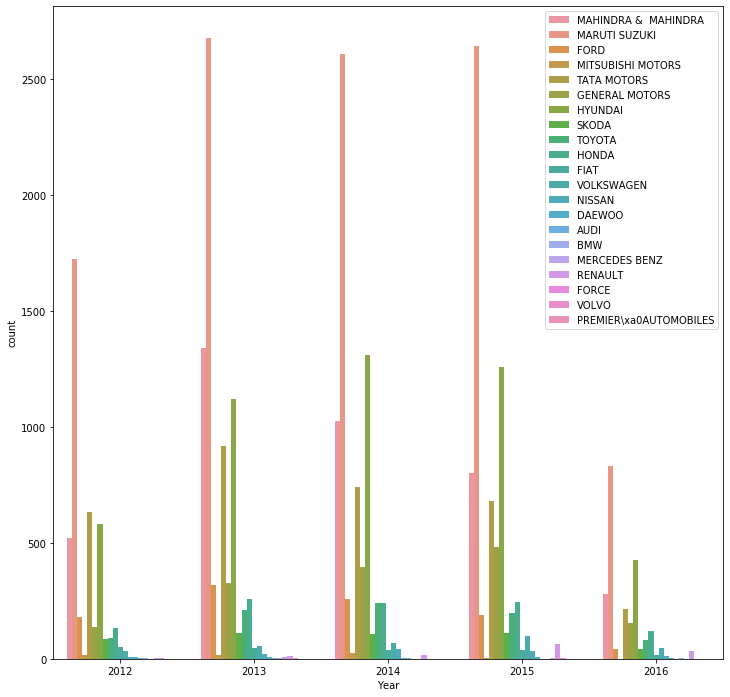

In [199]:
plt.figure(figsize=(12,12))
sns.countplot(x='Year',hue='Make',data=master_df.loc[master_df['Plant']=='BC03',:])
plt.legend(loc='upper right')

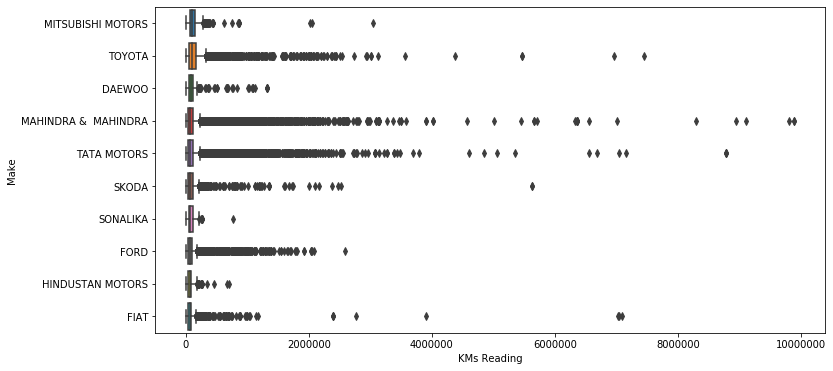

In [289]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=master_df['KMs Reading'],y=master_df['Make'],data=master_df,order=master_df.groupby('Make')['KMs Reading'].median().sort_values(ascending=False).index[:10])

In [23]:
#Mahindra , toyota , tata motors have higher km reading

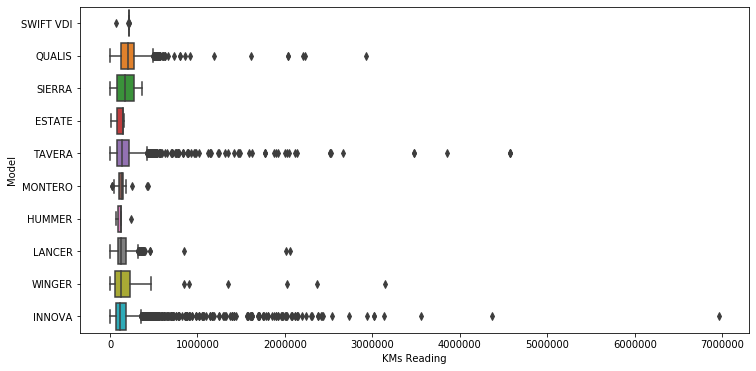

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x=master_df['KMs Reading'],y=master_df['Model'],data=master_df,order=master_df.groupby('Model')['KMs Reading'].median().sort_values(ascending=False).index[:10])

In [25]:
## tavera , qualis , innova have higher km reading

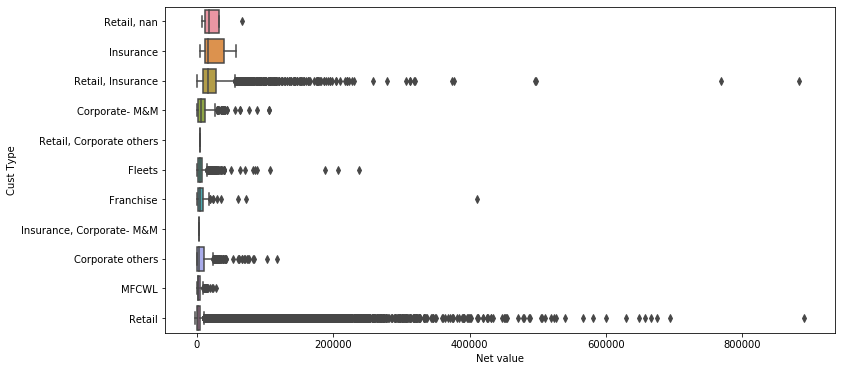

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(y=master_df['Cust Type'],x=master_df['Net value'],data=master_df,order=master_df.groupby('Cust Type')['Net value'].median().sort_values(ascending=False).index)

In [27]:
master_df['Cust Type'].value_counts()

Retail                       932163
Retail, Insurance              3111
Fleets                         2323
Corporate others                608
Corporate- M&M                  321
MFCWL                           241
Franchise                       137
Insurance                        10
Retail, nan                       4
Insurance, Corporate- M&M         3
Retail, Corporate others          1
Name: Cust Type, dtype: int64

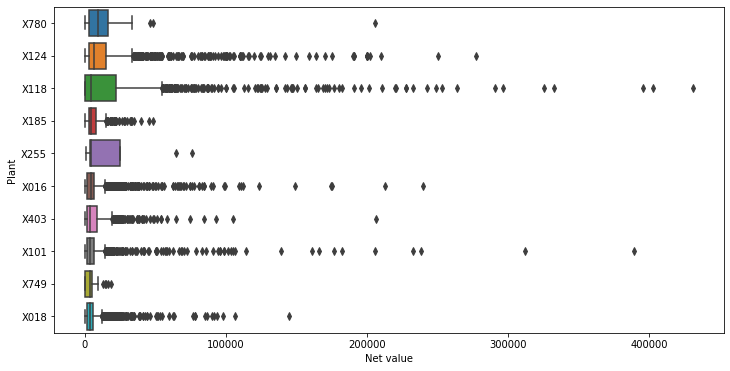

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(y=master_df['Plant'],x=master_df['Net value'],data=master_df,order=master_df.groupby('Plant')['Net value'].median().sort_values(ascending=False).index[:10])

In [225]:
aggregation_customer={
    'Job Card No' : {'Job_count': 'count'},
    'Net value' : {'Net value' : 'sum'}
    
}

customer_master_df=master_df.groupby('Customer No.')['Net value','Job Card No'].agg(aggregation_customer).reset_index()
customer_master_df['Avg_netvalue_pervisit']=customer_master_df['Net value']/customer_master_df['Job_count']


{'whiskers': [<matplotlib.lines.Line2D at 0x24647100c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2464710d3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x24647100860>],
 'medians': [<matplotlib.lines.Line2D at 0x2464710da58>],
 'fliers': [],
 'means': []}

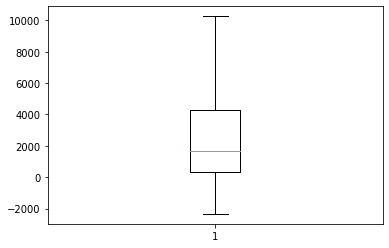

In [228]:
plt.ticklabel_format(style='plain', axis='y')
plt.boxplot(customer_master_df['Avg_netvalue_pervisit'], showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x246471627f0>,
 'caps': [<matplotlib.lines.Line2D at 0x24647162ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x246471623c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2464716c5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2464716c908>],
 'means': []}

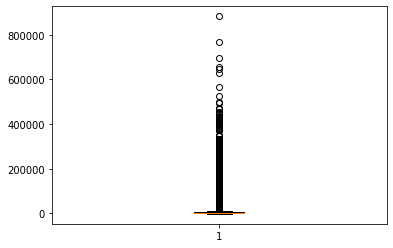

In [229]:
plt.ticklabel_format(style='plain', axis='y')
plt.boxplot(customer_master_df['Avg_netvalue_pervisit'])


In [237]:
customer_master_df['Avg_netvalue_pervisit'].describe(percentiles =  np.linspace(0,1,21))

count   483151.00
mean      4298.31
std      11055.63
min      -2342.20
0%       -2342.20
5%           0.01
10%         96.04
15.0%      183.20
20%        259.65
25%        350.25
30.0%      502.54
35%        712.00
40%        978.55
45%       1294.11
50%       1649.95
55.0%     2024.13
60.0%     2443.96
65%       2931.65
70%       3530.13
75%       4317.01
80%       5365.34
85.0%     6958.18
90%       9675.53
95%      15879.96
100%    882948.24
max     882948.24
Name: Avg_netvalue_pervisit, dtype: float64

In [242]:
customer_master_df.head(5)

,Customer No.,Job_count,Net value,Avg_netvalue_pervisit
0,1,3,0.00,0.00
1,10,15,33316.68,2221.11
2,100,2,20799.74,10399.87
3,1000,6,8813.44,1468.91
4,10000,7,1735.52,247.93


(-2342.2, 20000)

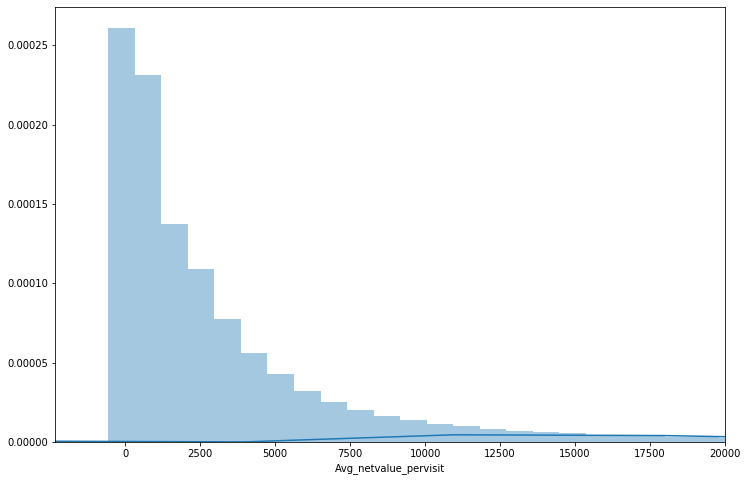

In [253]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
cust_hist=sns.distplot(customer_master_df['Avg_netvalue_pervisit'],hist=True,bins=1000)
cust_hist.set_xlim(-2342.20,20000)
#cust_hist.set_xlim(-2342.20,15879.96)

In [29]:
# Plant X255 has higher net value obtained , followed by X118 , X780 and X124
plant_list=['X255','X118','X780','X124']
master_df.loc[master_df['Plant'].isin(plant_list),['Plant','House number and street','City','StateName_Pincode']]
# X225 Opp.Hotel Sharda,	kuchaman city	Rajasthan
# X118 Portion of Survey no 860,	gwalior	Madhya Pradesh
# X780 Jk Main Road,	bhopal	Madhya Pradesh
# X124 Near Vallathol Junction,	kochi	Kerala

,Plant,House number and street,City,StateName_Pincode
265181,X124,"Near Vallathol Junction,",kochi,Kerala
265295,X124,"Near Vallathol Junction,",kochi,Kerala
265410,X124,"Near Vallathol Junction,",kochi,Kerala
265463,X124,"Near Vallathol Junction,",kochi,Kerala
265498,X124,"Near Vallathol Junction,",kochi,Kerala
267344,X124,"Near Vallathol Junction,",kochi,Kerala
267851,X124,"Near Vallathol Junction,",kochi,Kerala
269576,X124,"Near Vallathol Junction,",kochi,Kerala
269581,X124,"Near Vallathol Junction,",kochi,Kerala
269649,X124,"Near Vallathol Junction,",kochi,Kerala


In [30]:
aggregations_Regnno={
    'KMs Reading' : {'KMs Reading' : 'max'},
    'Job Card No' : {'JobCount' : 'nunique'},
    'Make' : {'Make' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Model' : {'Model' : lambda x: str(set(x)).strip("{}").replace("'","")}
}

master_df_km_perjob=master_df.groupby('Regn No')['KMs Reading','Job Card No','Make','Model'].agg(aggregations_Regnno).reset_index()

In [31]:
master_df_km_perjob.head(5)

,Regn No,KMs Reading,JobCount,Make,Model
0,AB09BW4783,45568,2,SKODA,FABIA
1,AB13AF4599,66253,1,TOYOTA,INNOVA
2,AB28DN2699,72700,1,MAHINDRA & MAHINDRA,THAR
3,AD10BB7671,1126,1,VOLKSWAGEN,POLO
4,AF02CC8444,1301,1,MARUTI SUZUKI,SWIFT


In [32]:
master_df_km_perjob['KMs_per_job']=master_df_km_perjob['KMs Reading']/master_df_km_perjob['JobCount']

In [33]:
master_df_km_perjob.sort_values('KMs_per_job',ascending=True)

,Regn No,KMs Reading,JobCount,Make,Model,KMs_per_job
185041,MH02AK2841,1,4,TATA MOTORS,INDIGO,0.25
63089,DL1CN3074,1,4,MARUTI SUZUKI,SWIFT,0.25
163058,KA25Z9299,1,3,MAHINDRA & MAHINDRA,XUV 500,0.33
16994,AP18P1156,1,3,MAHINDRA & MAHINDRA,SCORPIO CRDE,0.33
369411,TN04AA6576,1,3,FORD,FIESTA,0.33
358322,RJ41CA0252,1,2,MARUTI SUZUKI,SWIFT,0.50
323419,PY01BW3022,1,2,HONDA,CITY,0.50
434229,TN63Q4501,1,2,TATA MOTORS,INDIGO MANZA,0.50
340455,RJ14CR5974,1,2,MARUTI SUZUKI,SWIFT DZIRE,0.50
343656,RJ14UD0793,1,2,MARUTI SUZUKI,ERTIGA,0.50


In [34]:
aggregations_Make={
    'KMs Reading' : {'KMs Reading' : 'max'},
    'JobCount' : {'JobCount' : 'nunique'}
}

master_df_km_perjob_bymake=master_df_km_perjob.groupby('Make')['KMs Reading','JobCount'].agg(aggregations_Make).reset_index()

In [35]:
master_df_km_perjob_bymake['KMs_per_job']=master_df_km_perjob_bymake['KMs Reading']/master_df_km_perjob_bymake['JobCount']

In [36]:
master_df_km_perjob_bymake.sort_values('KMs_per_job',ascending=True)

,Make,KMs Reading,JobCount,KMs_per_job
47,MORRIS,6598,1,6598.00
22,"HONDA, GENERAL MOTORS",16247,1,16247.00
23,"HONDA, HYUNDAI",35003,2,17501.50
77,"VOLKSWAGEN, MARUTI SUZUKI",54264,3,18088.00
24,"HONDA, MARUTI SUZUKI",82219,4,20554.75
18,"GENERAL MOTORS, MARUTI SUZUKI",92378,4,23094.50
25,"HONDA, TATA MOTORS",49671,2,24835.50
4,"FIAT, HYUNDAI",99483,4,24870.75
65,"TOYOTA, FIAT",25592,1,25592.00
35,"HYUNDAI, TATA MOTORS",28287,1,28287.00


In [37]:
aggregations_Model={
    'KMs Reading' : {'KMs Reading' : 'max'},
    'JobCount' : {'JobCount' : 'nunique'},
    'Make' : {'Make' : lambda x: str(set(x)).strip("{}").replace("'","")}
}

master_df_km_perjob_bymodel=master_df_km_perjob.groupby('Model')['KMs Reading','JobCount','Make'].agg(aggregations_Model).reset_index()

In [38]:
master_df_km_perjob_bymodel['KMs_per_job']=master_df_km_perjob_bymodel['KMs Reading']/master_df_km_perjob_bymodel['JobCount']

In [107]:
master_df_km_perjob_bymodel.loc[master_df_km_perjob_bymodel['JobCount']>1].sort_values('KMs_per_job',ascending=True)

,Model,KMs Reading,JobCount,Make,KMs_per_job
360,"SANTRO, I20",23430,2,HYUNDAI,11715.00
201,"I10, I20",71800,6,HYUNDAI,11966.67
289,NUVOSPORT,66000,4,MAHINDRA & MAHINDRA,16500.00
329,RIO,102365,6,PREMIER\\\\xa0AUTOMOBILES,17060.83
451,VELOSTER,69107,4,HYUNDAI,17276.75
127,DATSUN REDI GO,87690,5,NISSAN,17538.00
292,OPEL,154562,8,GENERAL MOTORS,19320.25
281,MINIS,60906,3,BMW,20302.00
265,"LOGAN P, LOGAN D",184968,9,MAHINDRA & MAHINDRA,20552.00
30,"ALTO, 800",41526,2,MARUTI SUZUKI,20763.00


In [40]:
master_df._get_numeric_data().head(5)

,DBM Order,Fuel Type,Invoice_count,Job Card No,KMs Reading,Labour Total,Misc Total,Net value,OSL Total,Order Quantity,Parts Total,Pincode_final,Year
0,4.00,nan,1,4,191383,3455.92,100.00,16998.49,2399.95,731.60,11042.62,600032.00,2012
1,5.00,1.00,1,5,105073,2310.47,0.00,3779.80,0.00,290.20,1469.33,400093.00,2012
2,5.00,nan,1,5,105073,2310.47,0.00,3779.80,0.00,290.20,1469.33,400093.00,2012
3,5.00,nan,1,5,105073,2310.47,0.00,3779.80,0.00,290.20,1469.33,400093.00,2012
4,6.00,1.00,1,6,137832,1340.37,0.00,1340.37,0.00,109.00,0.00,500038.00,2012


In [41]:
master_df._get_numeric_data().corr()

,DBM Order,Fuel Type,Invoice_count,Job Card No,KMs Reading,Labour Total,Misc Total,Net value,OSL Total,Order Quantity,Parts Total,Pincode_final,Year
DBM Order,1.00,0.07,0.06,1.00,0.03,0.02,0.05,-0.02,-0.13,0.02,-0.02,0.09,0.90
Fuel Type,0.07,1.00,0.01,0.07,0.09,0.03,0.01,0.05,0.00,0.01,0.05,0.00,0.08
Invoice_count,0.06,0.01,1.00,0.06,0.00,0.13,0.04,0.12,0.01,0.09,0.12,-0.01,0.05
Job Card No,1.00,0.07,0.06,1.00,0.03,0.02,0.05,-0.02,-0.13,0.02,-0.02,0.09,0.90
KMs Reading,0.03,0.09,0.00,0.03,1.00,0.02,0.01,0.02,-0.01,0.00,0.02,0.02,0.04
Labour Total,0.02,0.03,0.13,0.02,0.02,1.00,0.03,0.65,0.01,0.55,0.40,0.04,0.03
Misc Total,0.05,0.01,0.04,0.05,0.01,0.03,1.00,0.28,0.01,0.03,0.14,0.01,0.05
Net value,-0.02,0.05,0.12,-0.02,0.02,0.65,0.28,1.00,0.34,0.37,0.90,0.02,-0.01
OSL Total,-0.13,0.00,0.01,-0.13,-0.01,0.01,0.01,0.34,1.00,0.01,0.24,-0.01,-0.12
Order Quantity,0.02,0.01,0.09,0.02,0.00,0.55,0.03,0.37,0.01,1.00,0.22,0.01,0.02


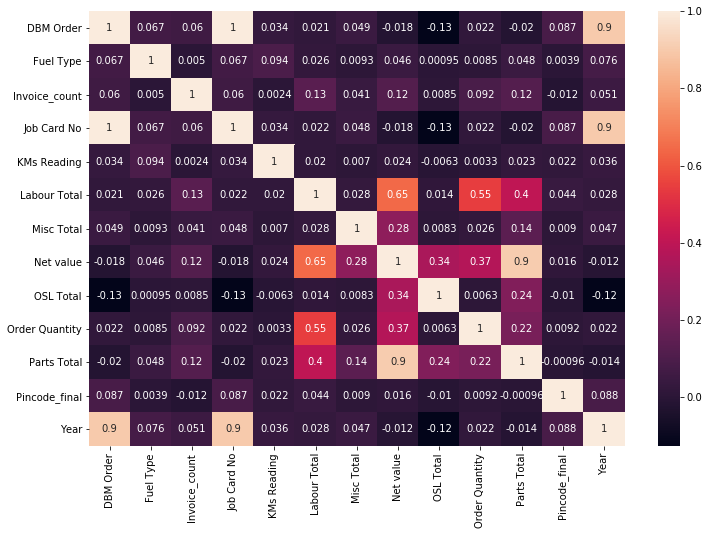

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(master_df._get_numeric_data().corr(),annot=True)

In [43]:
## to remove columns
master_df_for_model=master_df[master_df.columns.difference(['Description','DBM Order','House number and street','Item Category','Job Card No','JobCard Date','License Plate Number','Name 1','Pincode_final','Product GUID','Regn No','Service_Time','Vehicle Model'])]

In [44]:
master_df_for_model.head(5)

,City,Cust Type,Customer No.,DayName,Fuel Type,Invoice_count,KMs Reading,Labour Total,Make,Misc Total,Model,Net value,OSL Total,Order Quantity,Order Type,Parts Total,Plant,Service_time_category,StateName_Pincode,Year
0,NaN,Retail,E4981,Sunday,nan,1,191383,3455.92,MAHINDRA & MAHINDRA,100.00,LOGAN P,16998.49,2399.95,731.60,Running Repairs,11042.62,BC01,super_slow,Tamil Nadu,2012
1,NaN,Retail,10,Monday,1.00,1,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,3779.80,0.00,290.20,Paid Service,1469.33,BC01,mid,Maharashtra,2012
2,NaN,Retail,10,Monday,nan,1,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,3779.80,0.00,290.20,Paid Service,1469.33,BC01,mid,Maharashtra,2012
3,NaN,Retail,10,Monday,nan,1,105073,2310.47,GENERAL MOTORS,0.00,OPTRA,3779.80,0.00,290.20,Paid Service,1469.33,BC01,mid,Maharashtra,2012
4,NaN,Retail,7,Monday,1.00,1,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,1340.37,0.00,109.00,Paid Service,0.00,BC04,super_fast,Telangana,2012


In [45]:
master_df_for_model=master_df_for_model.loc[:,master_df_for_model.columns!='City']
master_df_for_model=master_df_for_model.loc[(master_df_for_model['Model'].notnull())&(master_df_for_model['Fuel Type'].notnull())&(master_df_for_model['Net value'].notnull())&(master_df_for_model['Order Quantity'].notnull())&(master_df_for_model['StateName_Pincode'].notnull()),:]

In [46]:
master_df_for_model.isnull().sum()*100/len(master_df_for_model)

Cust Type               0.00
Customer No.            0.00
DayName                 0.00
Fuel Type               0.00
Invoice_count           0.00
KMs Reading             0.00
Labour Total            0.00
Make                    0.00
Misc Total              0.00
Model                   0.00
Net value               0.00
OSL Total               0.00
Order Quantity          0.00
Order Type              0.00
Parts Total             0.00
Plant                   0.00
Service_time_category   0.00
StateName_Pincode       0.00
Year                    0.00
dtype: float64

In [47]:
len(master_df_for_model)

879603

In [48]:
master_df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879603 entries, 1 to 938924
Data columns (total 19 columns):
Cust Type                879603 non-null object
Customer No.             879603 non-null object
DayName                  879603 non-null object
Fuel Type                879603 non-null float64
Invoice_count            879603 non-null int64
KMs Reading              879603 non-null int64
Labour Total             879603 non-null float64
Make                     879603 non-null object
Misc Total               879603 non-null float64
Model                    879603 non-null object
Net value                879603 non-null float64
OSL Total                879603 non-null float64
Order Quantity           879603 non-null float64
Order Type               879603 non-null object
Parts Total              879603 non-null float64
Plant                    879603 non-null object
Service_time_category    879603 non-null object
StateName_Pincode        879603 non-null object
Year                

In [49]:
X=master_df_for_model.loc[:,master_df_for_model.columns.difference(['Net value','OSL Total','Parts Total','Labour Total','Misc Total'])]
Y=master_df_for_model.loc[:,'Net value']

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.3)
label_encoder = preprocessing.LabelEncoder()

In [51]:
for col in X_test.columns.values:
       # Encoding only categorical variables
    if X_test[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
        data=X_train[col].append(X_test[col])
        label_encoder.fit(data.values)
        X_train[col]=label_encoder.transform(X_train[col])
        X_test[col]=label_encoder.transform(X_test[col])

In [52]:
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)
print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))

0.21332650317247834
0.21172893101271362


In [281]:
master_df.loc[248302,:]

City                                                madurai
Cust Type                                            Retail
Customer No.                                         126495
DBM Order                                         259948.00
DayName                                            Saturday
Description                        ['MISC LABOR 0.5 HOURS']
Fuel Type                                              2.00
House number and street      D-25, SIDCO Industrial Estate,
Invoice_count                                             1
Item Category                                      ['P001']
Job Card No                                          259948
JobCard Date                            2015-09-19 00:00:00
KMs Reading                                           23456
Labour Total                                         300.00
License Plate Number                             TN69AU2533
Make                                   MAHINDRA &  MAHINDRA
Misc Total                              

In [55]:
#linear_model.predict([X_test.loc[248302,]])
X_new=np.array(X_test.loc[248302,:]).reshape(1,-1)
linear_model.predict(X_new)


array([1372.18274139])

In [56]:
#ordertype_df=master_df.loc['JobCard Date','Order Quantity','Order Type',]

In [57]:
aggregation_jobcardate={
    'Order Quantity' : {'Order Quantity' : 'sum'},
    'Invoice_count' : {'Invoice_count' : 'sum'},
    'Year' : {'Year' : 'mean'}
    
}
order_timeseries=master_df.groupby('JobCard Date')['Order Quantity','Invoice_count','Year'].agg(aggregation_jobcardate).reset_index()

In [58]:

order_timeseries['Order Quantity']=order_timeseries['Order Quantity'].astype(int)

In [59]:
#description_df_reshaped=master_df_trial.set_index('Job Card No')['Item Category'].apply(pd.Series).stack().reset_index(level=-1, drop=True).astype(int).reset_index()

In [60]:
order_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 4 columns):
JobCard Date      2069 non-null datetime64[ns]
Order Quantity    2069 non-null int32
Invoice_count     2069 non-null int64
Year              2069 non-null int64
dtypes: datetime64[ns](1), int32(1), int64(2)
memory usage: 56.7 KB


(array([736330., 736389., 736450., 736511., 736573., 736634., 736695.]),
 <a list of 7 Text xticklabel objects>)

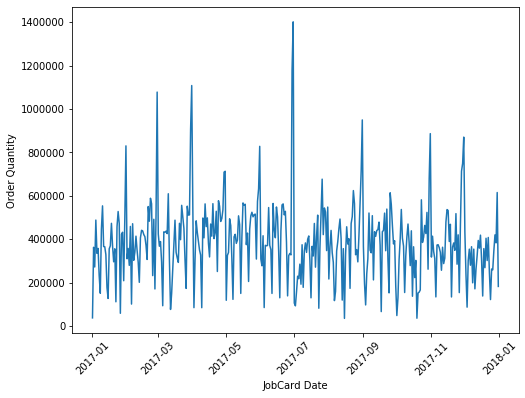

In [61]:
plt.figure(figsize=(8,6))
sns.lineplot(x='JobCard Date',y='Order Quantity',data=order_timeseries.loc[(order_timeseries['JobCard Date'].dt.year>=2017)&(order_timeseries['JobCard Date'].dt.year<=2017)])
plt.xticks(rotation=45)

(array([735964., 736024., 736085., 736146., 736208., 736269., 736330.]),
 <a list of 7 Text xticklabel objects>)

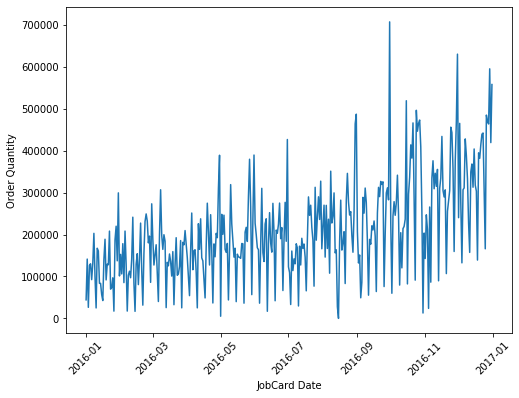

In [62]:
plt.figure(figsize=(8,6))
sns.lineplot(x='JobCard Date',y='Order Quantity',data=order_timeseries.loc[(order_timeseries['JobCard Date'].dt.year>=2016)&(order_timeseries['JobCard Date'].dt.year<=2016)])
plt.xticks(rotation=45)

(array([735599., 735658., 735719., 735780., 735842., 735903., 735964.]),
 <a list of 7 Text xticklabel objects>)

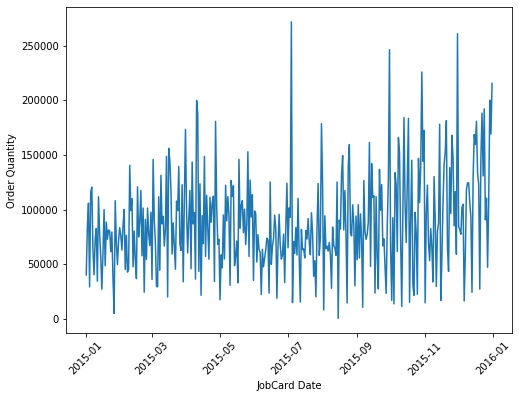

In [63]:
plt.figure(figsize=(8,6))
sns.lineplot(x='JobCard Date',y='Order Quantity',data=order_timeseries.loc[(order_timeseries['JobCard Date'].dt.year>=2015)&(order_timeseries['JobCard Date'].dt.year<=2015)])
plt.xticks(rotation=45)

In [268]:
aggregation_jobcardate={
    'Order Quantity' : {'Order Quantity' : 'sum'},
    'Invoice_count' : {'Invoice_count' : 'sum'},
    'Year' : {'Year' : 'mean'},
    'Net value' : {'Net value' : 'sum'}
    
}
order_timeseries_BC03=master_df.loc[master_df['Plant']=='BC03',:].groupby('JobCard Date')['Order Quantity','Invoice_count','Year','Net value'].agg(aggregation_jobcardate).reset_index()

(array([734685., 734869., 735050., 735234., 735415., 735599., 735780.,
        735964., 736146.]), <a list of 9 Text xticklabel objects>)

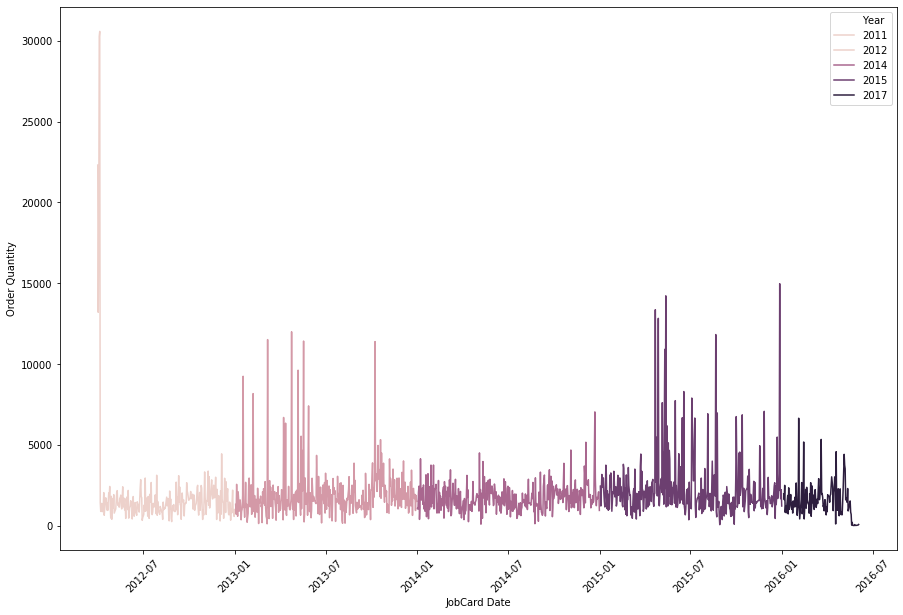

In [277]:
plt.figure(figsize=(15,10))
sns.lineplot(x='JobCard Date',y='Order Quantity',hue='Year',data=order_timeseries_BC03)
plt.xticks(rotation=45)

(array([734685., 734869., 735050., 735234., 735415., 735599., 735780.,
        735964., 736146.]), <a list of 9 Text xticklabel objects>)

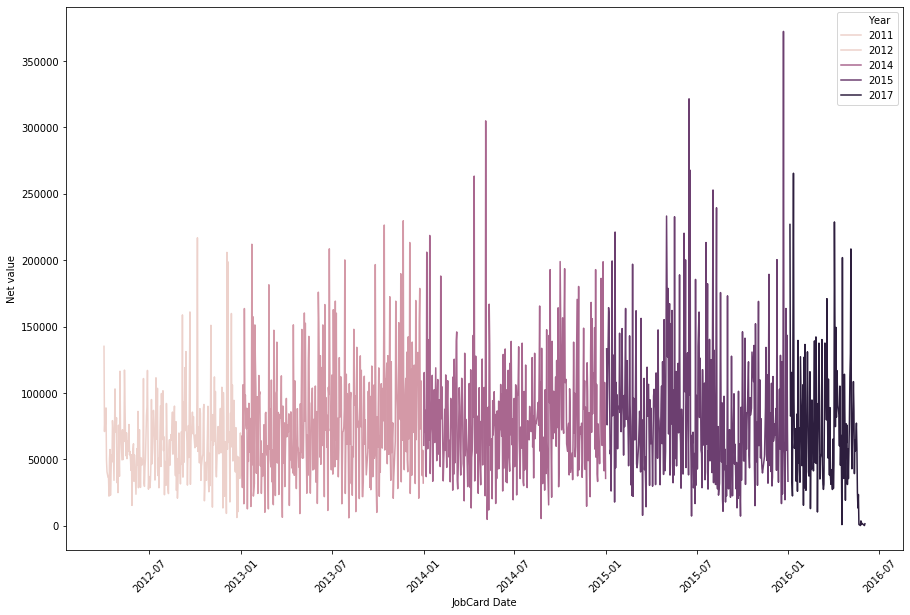

In [276]:
plt.figure(figsize=(15,10))
sns.lineplot(x='JobCard Date',y='Net value',hue='Year',data=order_timeseries_BC03)
plt.xticks(rotation=45)

(array([735964., 735995., 736024., 736055., 736085., 736116.]),
 <a list of 6 Text xticklabel objects>)

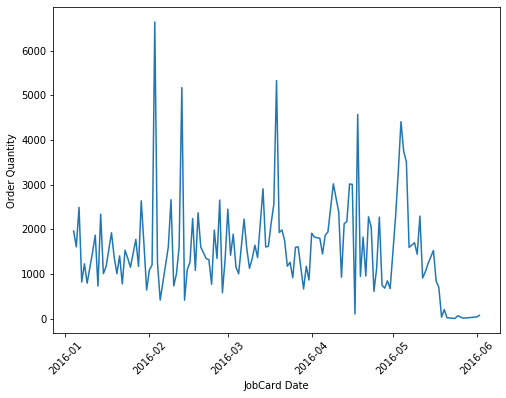

In [266]:
plt.figure(figsize=(8,6))
sns.lineplot(x='JobCard Date',y='Order Quantity',data=order_timeseries_BC03.loc[(order_timeseries_BC03['JobCard Date'].dt.year>=2016)&(order_timeseries_BC03['JobCard Date'].dt.year<=2016)])
plt.xticks(rotation=45)

(array([735964., 735995., 736024., 736055., 736085., 736116.]),
 <a list of 6 Text xticklabel objects>)

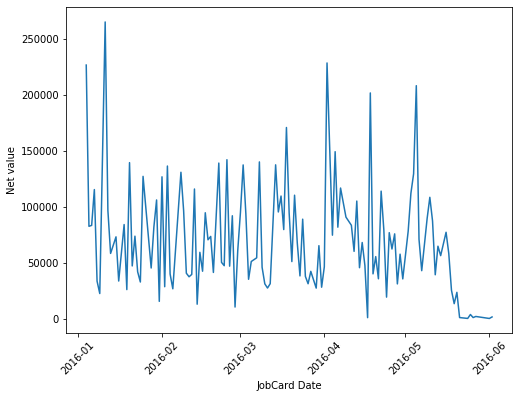

In [269]:
plt.figure(figsize=(8,6))
sns.lineplot(x='JobCard Date',y='Net value',data=order_timeseries_BC03.loc[(order_timeseries_BC03['JobCard Date'].dt.year>=2016)&(order_timeseries_BC03['JobCard Date'].dt.year<=2016)])
plt.xticks(rotation=45)

(array([735599., 735658., 735719., 735780., 735842., 735903., 735964.]),
 <a list of 7 Text xticklabel objects>)

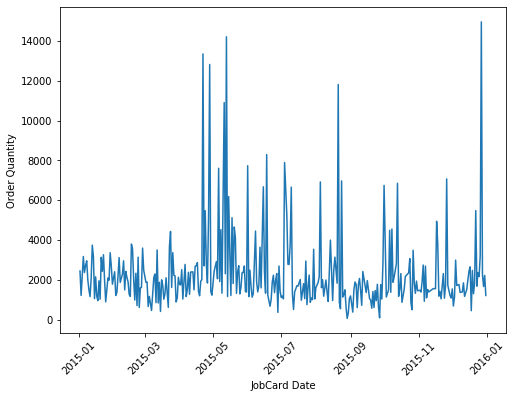

In [267]:
plt.figure(figsize=(8,6))
sns.lineplot(x='JobCard Date',y='Order Quantity',data=order_timeseries_BC03.loc[(order_timeseries_BC03['JobCard Date'].dt.year>=2015)&(order_timeseries_BC03['JobCard Date'].dt.year<=2015)])
plt.xticks(rotation=45)

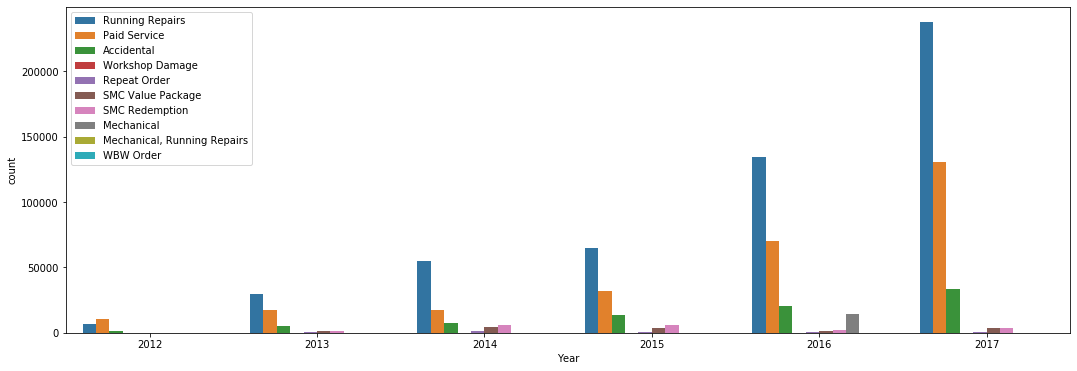

In [64]:
plt.figure(figsize=(18,6))
sns.countplot(x='Year',hue="Order Type",data=master_df.loc[(master_df['Order Type']!='Paid Service, Mechanical')&(master_df['Order Type']!='Mechanical, Paid Service')])
plt.legend(loc='upper left')

In [65]:
master_df['Order Type'].value_counts()

Running Repairs                528336
Paid Service                   278135
Accidental                      81413
SMC Redemption                  19526
Mechanical                      14110
SMC Value Package               13668
Repeat Order                     3406
WBW Order                         243
Mechanical, Running Repairs        36
Workshop Damage                    19
Paid Service, Mechanical           16
Mechanical, Paid Service           14
Name: Order Type, dtype: int64

In [66]:
RandomForest_model=RandomForestRegressor(bootstrap=True,max_depth=10,min_samples_split=500,random_state=0)

In [67]:
RandomForest_model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=500,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [68]:
print(RandomForest_model.score(X_train,Y_train))
print(RandomForest_model.score(X_test,Y_test))

0.40917105715535373
0.37692682930798904


In [69]:
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,Y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [70]:
print(ridgeReg.score(X_train,Y_train))
print(ridgeReg.score(X_test,Y_test))

0.21304446846686975
0.21091396404876084


In [71]:
alphas = np.array([1,0.5,0.1,0.05,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
ridgeReg_grid=Ridge(normalize=True)
grid = GridSearchCV(estimator=ridgeReg_grid, param_grid=dict(alpha=alphas))
grid.fit(X_train,Y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 5.e-02, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.21299419677956352
0.01


In [256]:
param_dist={'bootstrap': [True],
 'max_depth': [10, 20, 30],
 'max_features': ['sqrt'],
 'min_samples_split': [500 ,1000],
 'n_estimators': [10, 50, 100]}

RandomForest_grid=RandomForestRegressor(random_state=0)
RandomSearch_randomforest_model = RandomizedSearchCV(estimator = RandomForest_grid, param_distributions = param_dist, n_iter = 10, cv = 3)

In [257]:
RandomSearch_randomforest_model.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=0

In [258]:
RandomSearch_randomforest_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 500,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [262]:
print(RandomSearch_randomforest_model.score(X_train,Y_train))
print(RandomSearch_randomforest_model.score(X_test,Y_test))

0.4166665495195483
0.3694400016594267


In [287]:
X_train.head(5)

,Cust Type,Customer No.,DayName,Fuel Type,Invoice_count,KMs Reading,Make,Model,Order Quantity,Order Type,Plant,Service_time_category,StateName_Pincode,Year
422866,7,113502,2,1.00,1,20596,13,17,15.00,4,122,10,2,2016
409896,7,85414,5,2.00,1,24575,12,34,89.20,4,207,10,2,2016
75938,7,306784,0,2.00,1,115071,12,34,716.30,4,22,0,20,2014
408875,7,44060,1,2.00,1,148231,24,104,34.00,7,80,10,19,2016
678821,7,158334,5,2.00,1,85252,13,74,262.00,7,176,6,0,2017


In [74]:
aggregations_customerno={
    'Job Card No' : {'Job_count' : lambda x:len(x)},
    'JobCard Date' : {'Job_interval_days' : lambda x:(x.max()-x.min()).days},
    'Order Quantity' : {'Order Quantity' : 'sum'},
    'Net value' : {'Net value' : 'sum'}
}

CLTV_df=master_df.groupby('Customer No.')['Job Card No','JobCard Date','Order Quantity','Net value'].agg(aggregations_customerno).reset_index()

In [75]:
CLTV_df['avg_order_value']=CLTV_df['Net value']/CLTV_df['Job_count']

In [76]:
purchase_frequency=sum(CLTV_df['Job_count'])/CLTV_df.shape[0]

In [77]:
repeat_rate=CLTV_df[CLTV_df.Job_count > 1].shape[0]/CLTV_df.shape[0]

In [78]:
churn_rate=1-repeat_rate

In [79]:
CLTV_df['profit_margin']=CLTV_df['Net value']*0.05

In [80]:
CLTV_df['CLV']=(CLTV_df['avg_order_value']*purchase_frequency)/churn_rate

In [81]:
CLTV_df['cust_lifetime_value']=CLTV_df['CLV']*CLTV_df['profit_margin']

In [82]:
CLTV_df.head(10)

,Customer No.,Job_count,Job_interval_days,Order Quantity,Net value,avg_order_value,profit_margin,CLV,cust_lifetime_value
0,1,3,349,0.00,0.00,0.00,0.00,0.00,0.00
1,10,15,441,1132.20,33316.68,2221.11,1665.83,6991.87,11647293.88
2,100,2,158,9967.70,20799.74,10399.87,1039.99,32737.90,34046986.16
3,1000,6,883,300.70,8813.44,1468.91,440.67,4623.99,2037663.71
4,10000,7,923,455.12,1735.52,247.93,86.78,780.47,67725.79
5,100000,1,0,4.00,6026.05,6026.05,301.30,18969.49,5715553.83
6,100001,3,202,1208.20,4263.75,1421.25,213.19,4473.97,953795.06
7,100002,1,0,84.00,0.00,0.00,0.00,0.00,0.00
8,100003,1,0,0.00,0.00,0.00,0.00,0.00,0.00
9,100004,2,691,104.30,5712.44,2856.22,285.62,8991.13,2568065.90


In [83]:
master_df['month_yr'] = master_df['JobCard Date'].apply(lambda x: x.strftime('%b-%Y'))

In [84]:
sale=master_df.pivot_table(index=['Customer No.'],columns=['month_yr'],values='Net value',aggfunc='sum',fill_value=0).reset_index()

In [85]:
sale.head(5)

month_yr,Customer No.,Apr-2012,Apr-2013,Apr-2014,Apr-2015,Apr-2016,Apr-2017,Aug-2012,Aug-2013,Aug-2014,Aug-2015,Aug-2016,Aug-2017,Dec-2012,Dec-2013,Dec-2014,Dec-2015,Dec-2016,Dec-2017,Feb-2013,Feb-2014,Feb-2015,Feb-2016,Feb-2017,Jan-2013,Jan-2014,Jan-2015,Jan-2016,Jan-2017,Jul-2012,Jul-2013,Jul-2014,Jul-2015,Jul-2016,Jul-2017,Jun-2012,Jun-2013,Jun-2014,Jun-2015,Jun-2016,Jun-2017,Mar-2013,Mar-2014,Mar-2015,Mar-2016,Mar-2017,May-2012,May-2013,May-2014,May-2015,May-2016,May-2017,Nov-2012,Nov-2013,Nov-2014,Nov-2015,Nov-2016,Nov-2017,Oct-2012,Oct-2013,Oct-2014,Oct-2015,Oct-2016,Oct-2017,Sep-2012,Sep-2013,Sep-2014,Sep-2015,Sep-2016,Sep-2017
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,10,11339.40,0.00,0.00,0.00,0.00,0.00,5346.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6125.70,0.00,0.00,0.00,0.00,1799.52,0.00,0.00,0.00,0.00,0.00,0.00,8705.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100,14167.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6632.67,0.00,0.00,0.00,0.00,0.00
3,1000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2818.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1980.84,0.00,0.00,0.00,0.00,2094.09,0.00,0.00,0.00,0.00,0.00,0.00,749.42,0.00,0.00,0.00,0.00,723.48,0.00,446.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,10000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1001.29,185.96,0.00,0.00,0.00,249.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,299.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [108]:
sale['CLV']=CLTV_df['cust_lifetime_value']

In [112]:
sale.head(5)

month_yr,Customer No.,Apr-2012,Apr-2013,Apr-2014,Apr-2015,Apr-2016,Apr-2017,Aug-2012,Aug-2013,Aug-2014,Aug-2015,Aug-2016,Aug-2017,Dec-2012,Dec-2013,Dec-2014,Dec-2015,Dec-2016,Dec-2017,Feb-2013,Feb-2014,Feb-2015,Feb-2016,Feb-2017,Jan-2013,Jan-2014,Jan-2015,Jan-2016,Jan-2017,Jul-2012,Jul-2013,Jul-2014,Jul-2015,Jul-2016,Jul-2017,Jun-2012,Jun-2013,Jun-2014,Jun-2015,Jun-2016,Jun-2017,Mar-2013,Mar-2014,Mar-2015,Mar-2016,Mar-2017,May-2012,May-2013,May-2014,May-2015,May-2016,May-2017,Nov-2012,Nov-2013,Nov-2014,Nov-2015,Nov-2016,Nov-2017,Oct-2012,Oct-2013,Oct-2014,Oct-2015,Oct-2016,Oct-2017,Sep-2012,Sep-2013,Sep-2014,Sep-2015,Sep-2016,Sep-2017,CLV
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,10,11339.40,0.00,0.00,0.00,0.00,0.00,5346.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6125.70,0.00,0.00,0.00,0.00,1799.52,0.00,0.00,0.00,0.00,0.00,0.00,8705.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11647293.88
2,100,14167.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6632.67,0.00,0.00,0.00,0.00,0.00,34046986.16
3,1000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2818.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1980.84,0.00,0.00,0.00,0.00,2094.09,0.00,0.00,0.00,0.00,0.00,0.00,749.42,0.00,0.00,0.00,0.00,723.48,0.00,446.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2037663.71
4,10000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1001.29,185.96,0.00,0.00,0.00,249.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,299.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67725.79


In [109]:
X_sale=sale[['Jan-2015','Feb-2015','Mar-2015','Apr-2015','May-2015','Jun-2015','Jul-2015', 'Aug-2015','Sep-2015','Oct-2015','Nov-2015','Dec-2015','Jan-2016','Feb-2016','Mar-2016','Apr-2016','May-2016','Jun-2016','Jul-2016', 'Aug-2016','Sep-2016','Oct-2016','Nov-2016','Dec-2016','Jan-2017','Feb-2017','Mar-2017','Apr-2017','May-2017','Jun-2017','Jul-2017', 'Aug-2017','Sep-2017','Oct-2017','Nov-2017','Dec-2017']]
Y_sale=sale[['CLV']]

In [110]:
X_sale_train,X_sale_test,Y_sale_train,Y_sale_test=train_test_split(X_sale,Y_sale,random_state=0,test_size=0.3)

In [118]:
CLTV_linear_model=LinearRegression()
CLTV_linear_model.fit(X_sale_train,Y_sale_train)
print(CLTV_linear_model.score(X_sale_train,Y_sale_train))
print(r2_score(Y_sale_train,CLTV_linear_model.predict(X_sale_train)))

0.34313786151393877
0.34313786151393877


In [113]:
print(CLTV_linear_model.score(X_sale_test,Y_sale_test))

0.20589534585538039


In [114]:
RandomForest_CLTV_model=RandomForestRegressor(bootstrap=True,max_depth=10,min_samples_split=50,random_state=0)

In [115]:
RandomForest_CLTV_model.fit(X_sale_train,Y_sale_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [116]:
print(RandomForest_CLTV_model.score(X_sale_train,Y_sale_train))
print(RandomForest_CLTV_model.score(X_sale_test,Y_sale_test))

0.6375758061103842
0.19070791585925218


In [94]:
RandomForest_CLTV_model=RandomForestRegressor(random_state=0)

In [95]:
param_random={'bootstrap': [True],
 'max_depth': [10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [500 ,1000],
 'n_estimators': [10, 50, 100]}

CLTV_random=RandomizedSearchCV(estimator=RandomForest_CLTV_model,param_distributions=param_random,n_iter=5,cv=3)

In [96]:
CLTV_random.fit(X_sale_train,Y_sale_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=0

In [97]:
CLTV_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 1000,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [98]:
print(CLTV_random.score(X_sale_train,Y_sale_train))
print(CLTV_random.score(X_sale_test,Y_sale_test))

0.4712731418063925
0.15217318905120647


In [104]:
xgb_CLTV=XGBRegressor(objective ='reg:linear',learning_rate=0.1,max_depth=3,n_estimators=100)

In [105]:
xgb_CLTV.fit(X_sale_train,Y_sale_train)

[23:24:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [106]:
print(xgb_CLTV.score(X_sale_train,Y_sale_train))
print(xgb_CLTV.score(X_sale_test,Y_sale_test))

0.6796892706521631
0.2697752452839144
